# Machine Learning Supervised

### Import Library dan Load DataSet

In [53]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [54]:
file_path = '/content/drive/MyDrive/Colab Notebooks/Day 29 Tugas/1702184567307-WA_FnUseC_TelcoCustomerChurn (1).csv'
data = pd.read_csv(file_path)
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## 1. Pra-pemrosesan Data

### Missing Value, Pembersihan Data dan Encoding Data Kategorikal

In [55]:
# Mengecek Missing Value pada dataset
y = data.isnull().sum()
y

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [56]:
# Checking if 'TotalCharges' is numeric (it looks like some values may be strings)
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

# Handling missing values in 'TotalCharges' by replacing them with the median
data['TotalCharges'].fillna(data['TotalCharges'].median(), inplace=True)

# Drop 'customerID' as it's not useful for modeling
data.drop('customerID', axis=1, inplace=True)

# Encoding categorical features using LabelEncoder
categorical_columns = data.select_dtypes(include=['object']).columns
label_encoder = LabelEncoder()

for column in categorical_columns:
    data[column] = label_encoder.fit_transform(data[column])

# Checking the cleaned dataset
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


### Memisahkan Dataset dan Target

In [57]:
# Separate features and target
X = data.drop('Churn', axis=1)
y = data['Churn']

## 2. Pemodelan

### Model Supervised Learning

In [58]:
!pip install xgboost
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

# Initialize models
decision_tree = DecisionTreeClassifier(random_state=42)
random_forest = RandomForestClassifier(random_state=42)
xgboost_model = xgb.XGBClassifier(random_state=42)


### Training Test dan Test Set

In [59]:
from sklearn.model_selection import train_test_split

# Split the dataset into 80% training and 20% test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Menggunakan SMOTE

In [60]:
!pip install imbalanced-learn
from imblearn.over_sampling import SMOTE

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to the training data
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

### Train Model dan Test Model

Decision Tree Accuracy: 0.7260468417317246

Decision Tree Metrics:
Accuracy: 0.7260
Precision: 0.4847
Recall: 0.5523
F1-Score: 0.5163


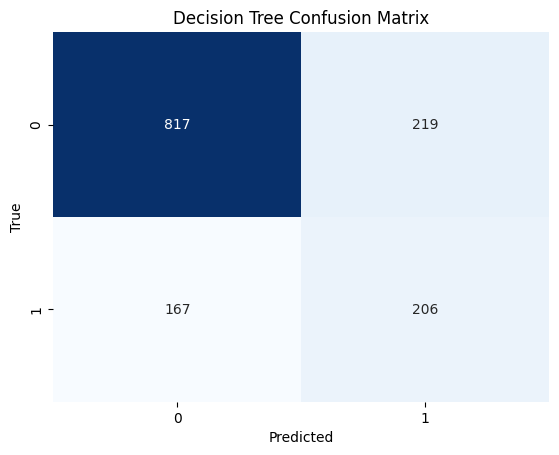

Random Forest Accuracy: 0.7750177430801988

Random Forest Metrics:
Accuracy: 0.7750
Precision: 0.5749
Recall: 0.5764
F1-Score: 0.5756


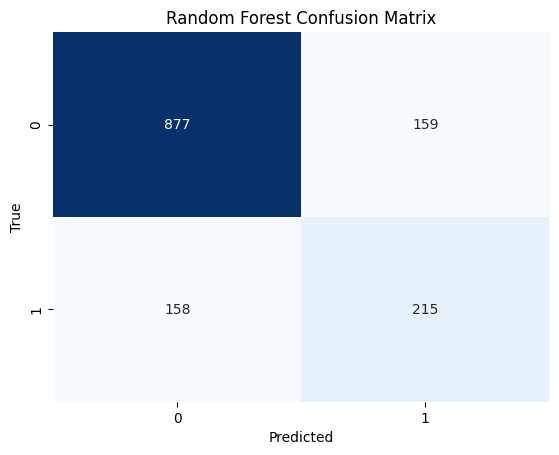

XGBoost Accuracy: 0.7714691270404542

XGBoost Metrics:
Accuracy: 0.7715
Precision: 0.5649
Recall: 0.5952
F1-Score: 0.5796


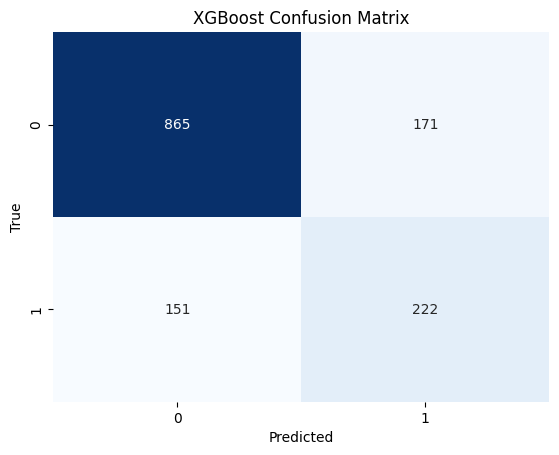

In [61]:
from sklearn.metrics import confusion_matrix, accuracy_score

# Function to calculate precision, recall, and F1-score manually
def calculate_metrics(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    tn, fp, fn, tp = cm.ravel()  # Extract true negatives, false positives, false negatives, true positives

    # Accuracy
    accuracy = (tp + tn) / (tp + tn + fp + fn)

    # Precision (avoid division by zero)
    precision = tp / (tp + fp) if (tp + fp) != 0 else 0

    # Recall (Sensitivity or True Positive Rate)
    recall = tp / (tp + fn) if (tp + fn) != 0 else 0

    # F1-score (Harmonic mean of precision and recall)
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0

    # Print the results
    print(f'\n{model_name} Metrics:')
    print(f'Accuracy: {accuracy:.4f}')
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1-Score: {f1:.4f}')

    # Confusion Matrix Visualization
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'{model_name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# Train and evaluate Decision Tree
decision_tree.fit(X_train_smote, y_train_smote)
y_pred_dt = decision_tree.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
calculate_metrics(y_test, y_pred_dt, 'Decision Tree')

# Train and evaluate Random Forest
random_forest.fit(X_train_smote, y_train_smote)
y_pred_rf = random_forest.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
calculate_metrics(y_test, y_pred_rf, 'Random Forest')

# Train and evaluate XGBoost
xgboost_model.fit(X_train_smote, y_train_smote)
y_pred_xgb = xgboost_model.predict(X_test)
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
calculate_metrics(y_test, y_pred_xgb, 'XGBoost')


## 3. Evaluasi Model

In [62]:
# List of models and their names
models = {
    'Decision Tree': decision_tree,
    'Random Forest': random_forest,
    'XGBoost': xgboost_model
}

# Initialize a dictionary to store the metrics
metrics_comparison = {
    'Model': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1-Score': []
}

# Function to calculate precision, recall, and F1-score manually
def calculate_metrics(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    tn, fp, fn, tp = cm.ravel()  # Extract true negatives, false positives, false negatives, true positives

    # Accuracy
    accuracy = (tp + tn) / (tp + tn + fp + fn)

    # Precision (avoid division by zero)
    precision = tp / (tp + fp) if (tp + fp) != 0 else 0

    # Recall (Sensitivity or True Positive Rate)
    recall = tp / (tp + fn) if (tp + fn) != 0 else 0

    # F1-score (Harmonic mean of precision and recall)
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0

    return accuracy, precision, recall, f1

# Loop through each model, calculate metrics, and add to the dictionary
for model_name, model in models.items():
    # Train the model
    model.fit(X_train_smote, y_train_smote)

    # Predict the test set
    y_pred = model.predict(X_test)

    # Calculate metrics
    accuracy, precision, recall, f1 = calculate_metrics(y_test, y_pred)

    # Append results to the comparison dictionary
    metrics_comparison['Model'].append(model_name)
    metrics_comparison['Accuracy'].append(accuracy)
    metrics_comparison['Precision'].append(precision)
    metrics_comparison['Recall'].append(recall)
    metrics_comparison['F1-Score'].append(f1)

# Convert the dictionary to a DataFrame
comparison_df = pd.DataFrame(metrics_comparison)

# Print the comparison DataFrame
print(comparison_df)


           Model  Accuracy  Precision    Recall  F1-Score
0  Decision Tree  0.726047   0.484706  0.552279  0.516291
1  Random Forest  0.775018   0.574866  0.576408  0.575636
2        XGBoost  0.771469   0.564885  0.595174  0.579634


### Kesimpulan dari Evaluasi Model

Analisis Perbandingan Model:
*   **Decision Tree:**


**Accuracy: 72.6%**

**Precision: 48.47%**

**Recall: 55.23%**

**F1-Score: 51.63%**


Meskipun Decision Tree memiliki Recall yang lumayan **(55.23%)**, Precision dan F1-Score yang rendah menunjukkan bahwa model ini kurang andal dalam membuat prediksi yang tepat, terutama dalam memprediksi churn secara akurat.


*  **Random Forest:**


**Accuracy: 77.5%**

**Precision: 57.49%**

**Recall: 57.64%**

**F1-Score: 57.56%**


Random Forest memberikan hasil yang lebih baik dari segi akurasi dan keseimbangan antara Precision dan Recall. Dengan F1-Score 57.56%, model ini menunjukkan kinerja yang lebih konsisten dan dapat dipercaya dibandingkan Decision Tree.


*   **XGBoost:**

**Accuracy: 77.1%**

**Precision: 56.49%**

**Recall: 59.52%**

**F1-Score: 57.96%**

XGBoost menunjukkan kinerja yang hampir mirip dengan Random Forest dari sisi Accuracy (77.1%), namun unggul sedikit dalam hal Recall dan F1-Score. Ini menunjukkan bahwa XGBoost sedikit lebih baik dalam mengenali pelanggan yang benar-benar akan churn, serta lebih seimbang antara precision dan recall.


Kesimpulan:
XGBoost adalah model terbaik berdasarkan hasil ini. Meskipun akurasinya sedikit di bawah Random Forest, XGBoost memiliki Recall yang lebih tinggi (59.52%) dan F1-Score tertinggi (57.96%), yang berarti lebih baik dalam menangkap pelanggan yang churn tanpa mengorbankan terlalu banyak precision.
Jika keseimbangan antara precision dan recall penting (yang sering terjadi dalam kasus churn prediction), XGBoost lebih diunggulkan.


Pilihan Akhir:
XGBoost: Dipilih sebagai model terbaik karena F1-Score dan Recall yang lebih tinggi, memberikan keseimbangan yang lebih baik dalam menangkap pelanggan churn dengan akurasi yang kompetitif.